In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import yfinance as yf
import plotly.graph_objects as go

#### 1. Downloading and cleaning the dataset

In [2]:
#Getting the list of companies in NASDAQ from wikipedia
nasdaq100 = pd.read_html("https://en.wikipedia.org/wiki/Nasdaq-100")[4]
nasdaq100

,Company,Ticker,GICS Sector,GICS Sub-Industry
0,Adobe Inc.,ADBE,Information Technology,Application Software
1,ADP,ADP,Industrials,Human Resource & Employment Services
2,Airbnb,ABNB,Consumer Discretionary,"Hotels, Resorts & Cruise Lines"
3,Alphabet Inc. (Class A),GOOGL,Communication Services,Interactive Media & Services
4,Alphabet Inc. (Class C),GOOG,Communication Services,Interactive Media & Services
...,...,...,...,...
96,Walgreens Boots Alliance,WBA,Consumer Staples,Drug Retail
97,Warner Bros. Discovery,WBD,Communication Services,Broadcasting
98,"Workday, Inc.",WDAY,Information Technology,Application Software
99,Xcel Energy,XEL,Utilities,Multi-Utilities


In [3]:
#Getting the ticker list for all the companies
nasdaq100["Ticker"] = nasdaq100["Ticker"].str.replace(".","-")
ticker_list = nasdaq100["Ticker"].unique().tolist()
ticker_list

C:\Users\Dell-PC\AppData\Local\Temp\ipykernel_20040\723591911.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  nasdaq100["Ticker"] = nasdaq100["Ticker"].str.replace(".","-")


['ADBE',
 'ADP',
 'ABNB',
 'GOOGL',
 'GOOG',
 'AMZN',
 'AMD',
 'AEP',
 'AMGN',
 'ADI',
 'ANSS',
 'AAPL',
 'AMAT',
 'ASML',
 'AZN',
 'TEAM',
 'ADSK',
 'BKR',
 'BIIB',
 'BKNG',
 'AVGO',
 'CDNS',
 'CDW',
 'CHTR',
 'CTAS',
 'CSCO',
 'CCEP',
 'CTSH',
 'CMCSA',
 'CEG',
 'CPRT',
 'CSGP',
 'COST',
 'CRWD',
 'CSX',
 'DDOG',
 'DXCM',
 'FANG',
 'DLTR',
 'DASH',
 'EA',
 'EXC',
 'FAST',
 'FTNT',
 'GEHC',
 'GILD',
 'GFS',
 'HON',
 'IDXX',
 'ILMN',
 'INTC',
 'INTU',
 'ISRG',
 'KDP',
 'KLAC',
 'KHC',
 'LRCX',
 'LIN',
 'LULU',
 'MAR',
 'MRVL',
 'MELI',
 'META',
 'MCHP',
 'MU',
 'MSFT',
 'MRNA',
 'MDLZ',
 'MDB',
 'MNST',
 'NFLX',
 'NVDA',
 'NXPI',
 'ORLY',
 'ODFL',
 'ON',
 'PCAR',
 'PANW',
 'PAYX',
 'PYPL',
 'PDD',
 'PEP',
 'QCOM',
 'REGN',
 'ROP',
 'ROST',
 'SIRI',
 'SBUX',
 'SNPS',
 'TTWO',
 'TMUS',
 'TSLA',
 'TXN',
 'TTD',
 'VRSK',
 'VRTX',
 'WBA',
 'WBD',
 'WDAY',
 'XEL',
 'ZS']

In [4]:
#Getting the previous three years data of each company listed in NASDAQ from the yfinance library of Python
end_date = pd.to_datetime("2024-03-31")
start_date = end_date - pd.DateOffset(months = 37)
nasdaq_data = yf.download(ticker_list, start = start_date, end = end_date)
nasdaq_data.to_csv("nasdaq_3years_complete_data.csv") #Saving the data to a .csv file

[*********************100%%**********************]  101 of 101 completed


In [5]:
#Downloading the Adjusted Close Prices of companies in NASDAQ Index
nasdaq_data_AdjClose = yf.download(ticker_list, start = start_date, end = end_date)["Adj Close"]
nasdaq_data_AdjClose.to_csv("nasdaq_3years_AdjustedClose_data.csv") #Saving the data to a .csv file
nasdaq_data_AdjClose

[*********************100%%**********************]  101 of 101 completed


Ticker,AAPL,ABNB,ADBE,ADI,ADP,ADSK,AEP,AMAT,AMD,AMGN,...,TTD,TTWO,TXN,VRSK,VRTX,WBA,WBD,WDAY,XEL,ZS
Date,,,,,,,,,,,,,,,,,,,,,
2021-03-01,125.429512,196.419998,469.570007,150.166092,166.178711,284.269989,67.972336,119.191536,86.389999,204.799683,...,83.234001,187.449997,162.211273,163.589172,210.380005,41.021927,58.180000,252.800003,53.544773,210.160004
2021-03-02,122.808846,189.899994,466.589996,146.094482,163.781998,277.920013,67.741951,114.560371,84.129997,203.581909,...,79.791000,188.169998,159.673141,162.942825,212.059998,40.670429,59.240002,247.960007,53.390888,202.610001
2021-03-03,119.805367,180.399994,448.450012,141.975586,163.360703,269.299988,67.626762,112.551903,80.860001,202.003372,...,69.593002,180.149994,155.747269,161.405243,208.440002,40.833317,61.450001,236.699997,52.530910,187.830002
2021-03-04,117.911018,180.229996,439.059998,136.843475,160.102661,265.440002,68.450836,105.532028,77.750000,200.172211,...,64.015999,174.029999,149.045929,158.310532,207.789993,40.173191,62.599998,230.350006,53.336567,180.899994
2021-03-05,119.177185,179.809998,440.829987,140.971863,166.890244,267.390015,69.912903,110.611687,78.519997,205.422119,...,65.417000,170.809998,153.327850,164.646866,211.979996,40.464672,64.250000,237.020004,55.536297,175.369995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-22,172.046646,167.860001,499.519989,193.509995,247.610001,262.859985,82.144127,210.250000,179.649994,274.222351,...,85.059998,152.460007,171.245758,234.860001,415.660004,20.580000,8.440000,277.500000,52.270000,194.949997
2024-03-25,170.618591,167.990005,507.230011,190.630005,244.199997,261.570007,82.064911,208.460007,178.630005,278.839539,...,87.550003,146.139999,169.627426,232.000000,416.029999,20.629999,8.460000,275.679993,52.480000,194.070007
2024-03-26,169.480133,167.389999,507.600006,188.960007,245.070007,261.670013,81.678696,206.669998,177.869995,279.782837,...,87.050003,146.669998,166.708466,231.210007,418.459991,20.510000,8.380000,277.380005,51.799999,195.630005


In [6]:
#Dropping of the companies for which the data could not be found or fetched from yfinance library
data_modified = nasdaq_data_AdjClose.dropna(axis = 1)
data_modified

Ticker,AAPL,ABNB,ADBE,ADI,ADP,ADSK,AEP,AMAT,AMD,AMGN,...,TTD,TTWO,TXN,VRSK,VRTX,WBA,WBD,WDAY,XEL,ZS
Date,,,,,,,,,,,,,,,,,,,,,
2021-03-01,125.429512,196.419998,469.570007,150.166092,166.178711,284.269989,67.972336,119.191536,86.389999,204.799683,...,83.234001,187.449997,162.211273,163.589172,210.380005,41.021927,58.180000,252.800003,53.544773,210.160004
2021-03-02,122.808846,189.899994,466.589996,146.094482,163.781998,277.920013,67.741951,114.560371,84.129997,203.581909,...,79.791000,188.169998,159.673141,162.942825,212.059998,40.670429,59.240002,247.960007,53.390888,202.610001
2021-03-03,119.805367,180.399994,448.450012,141.975586,163.360703,269.299988,67.626762,112.551903,80.860001,202.003372,...,69.593002,180.149994,155.747269,161.405243,208.440002,40.833317,61.450001,236.699997,52.530910,187.830002
2021-03-04,117.911018,180.229996,439.059998,136.843475,160.102661,265.440002,68.450836,105.532028,77.750000,200.172211,...,64.015999,174.029999,149.045929,158.310532,207.789993,40.173191,62.599998,230.350006,53.336567,180.899994
2021-03-05,119.177185,179.809998,440.829987,140.971863,166.890244,267.390015,69.912903,110.611687,78.519997,205.422119,...,65.417000,170.809998,153.327850,164.646866,211.979996,40.464672,64.250000,237.020004,55.536297,175.369995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-22,172.046646,167.860001,499.519989,193.509995,247.610001,262.859985,82.144127,210.250000,179.649994,274.222351,...,85.059998,152.460007,171.245758,234.860001,415.660004,20.580000,8.440000,277.500000,52.270000,194.949997
2024-03-25,170.618591,167.990005,507.230011,190.630005,244.199997,261.570007,82.064911,208.460007,178.630005,278.839539,...,87.550003,146.139999,169.627426,232.000000,416.029999,20.629999,8.460000,275.679993,52.480000,194.070007
2024-03-26,169.480133,167.389999,507.600006,188.960007,245.070007,261.670013,81.678696,206.669998,177.869995,279.782837,...,87.050003,146.669998,166.708466,231.210007,418.459991,20.510000,8.380000,277.380005,51.799999,195.630005


#### 2. Normalizing the dataset and obtaining the covariance matrix

In [7]:
#Computing logarithmic returns for all the stocks in NASDAQ index
data_normalised = np.log(data_modified/data_modified.shift(1))
data_normalised = data_normalised.dropna() #Dropping of the first row as it will have NaN values
data_normalised

Ticker,AAPL,ABNB,ADBE,ADI,ADP,ADSK,AEP,AMAT,AMD,AMGN,...,TTD,TTWO,TXN,VRSK,VRTX,WBA,WBD,WDAY,XEL,ZS
Date,,,,,,,,,,,,,,,,,,,,,
2021-03-02,-0.021115,-0.033758,-0.006366,-0.027488,-0.014528,-0.022591,-0.003395,-0.039630,-0.026509,-0.005964,...,-0.042245,0.003834,-0.015771,-0.003959,0.007954,-0.008605,0.018055,-0.019331,-0.002878,-0.036586
2021-03-03,-0.024761,-0.051321,-0.039654,-0.028598,-0.002576,-0.031507,-0.001702,-0.017687,-0.039644,-0.007784,...,-0.136747,-0.043556,-0.024894,-0.009481,-0.017218,0.003997,0.036627,-0.046474,-0.016238,-0.075746
2021-03-04,-0.015938,-0.000943,-0.021161,-0.036817,-0.020145,-0.014437,0.012112,-0.064400,-0.039221,-0.009106,...,-0.083531,-0.034562,-0.043980,-0.019360,-0.003123,-0.016298,0.018541,-0.027194,0.015220,-0.037593
2021-03-05,0.010681,-0.002333,0.004023,0.029723,0.041521,0.007319,0.021134,0.047011,0.009855,0.025889,...,0.021649,-0.018676,0.028324,0.039244,0.019964,0.007229,0.026016,0.028545,0.040415,-0.031046
2021-03-08,-0.042567,0.005546,-0.045551,-0.032911,0.012044,-0.054924,0.019951,-0.070947,-0.059829,0.000351,...,0.037165,-0.055304,-0.035332,0.020780,0.007520,0.026758,0.045635,-0.025424,0.009894,-0.043887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-22,0.005296,-0.001904,-0.023211,-0.008439,-0.005397,-0.010935,-0.001807,-0.002613,0.005414,-0.002820,...,0.000000,0.001904,-0.000638,-0.004461,-0.000120,-0.010633,-0.032637,0.003646,-0.000574,-0.015877
2024-03-25,-0.008335,0.000774,0.015317,-0.014995,-0.013867,-0.004920,-0.000965,-0.008550,-0.005694,0.016697,...,0.028853,-0.042337,-0.009495,-0.012252,0.000890,0.002427,0.002367,-0.006580,0.004010,-0.004524
2024-03-26,-0.006695,-0.003578,0.000729,-0.008799,0.003556,0.000382,-0.004717,-0.008624,-0.004264,0.003377,...,-0.005727,0.003620,-0.017358,-0.003411,0.005824,-0.005834,-0.009501,0.006148,-0.013042,0.008006


In [8]:
#Getting the covariance matrix 
covariance_matrix = data_normalised.cov()
covariance_matrix

Ticker,AAPL,ABNB,ADBE,ADI,ADP,ADSK,AEP,AMAT,AMD,AMGN,...,TTD,TTWO,TXN,VRSK,VRTX,WBA,WBD,WDAY,XEL,ZS
Ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,0.000290,0.000247,0.000243,0.000199,0.000130,0.000242,0.000061,0.000272,0.000310,0.000049,...,0.000359,0.000140,0.000180,0.000116,0.000094,0.000110,0.000175,0.000219,0.000063,0.000314
ABNB,0.000247,0.000959,0.000316,0.000288,0.000147,0.000386,0.000034,0.000376,0.000493,0.000018,...,0.000711,0.000240,0.000222,0.000127,0.000093,0.000160,0.000433,0.000349,0.000012,0.000569
ADBE,0.000243,0.000316,0.000556,0.000247,0.000150,0.000356,0.000046,0.000348,0.000438,0.000061,...,0.000483,0.000185,0.000217,0.000151,0.000098,0.000094,0.000146,0.000336,0.000055,0.000478
ADI,0.000199,0.000288,0.000247,0.000353,0.000132,0.000272,0.000053,0.000383,0.000396,0.000046,...,0.000428,0.000153,0.000271,0.000103,0.000074,0.000119,0.000175,0.000226,0.000048,0.000322
ADP,0.000130,0.000147,0.000150,0.000132,0.000202,0.000164,0.000075,0.000166,0.000174,0.000068,...,0.000219,0.000087,0.000126,0.000114,0.000072,0.000094,0.000119,0.000158,0.000073,0.000191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WBA,0.000110,0.000160,0.000094,0.000119,0.000094,0.000129,0.000091,0.000142,0.000141,0.000078,...,0.000151,0.000079,0.000111,0.000066,0.000068,0.000377,0.000212,0.000091,0.000076,0.000089
WBD,0.000175,0.000433,0.000146,0.000175,0.000119,0.000246,0.000095,0.000218,0.000292,0.000055,...,0.000466,0.000188,0.000163,0.000072,0.000085,0.000212,0.001288,0.000222,0.000066,0.000364
WDAY,0.000219,0.000349,0.000336,0.000226,0.000158,0.000348,0.000045,0.000329,0.000395,0.000042,...,0.000559,0.000194,0.000196,0.000152,0.000084,0.000091,0.000222,0.000560,0.000044,0.000540


#### 3. Functions for computing Expected Return, Volatility and Sharpe ratio

In [9]:
#Function for calculating returns
def expected_return(weights, data_normalised):
    return np.sum(data_normalised.mean()*weights)*252 #Annualizing the returns (there are 252 trading days in a year)

#Function for calculating volatility
def expected_volatility(weights, covariance_matrix):
    return np.sqrt(np.dot(weights.T, np.dot(covariance_matrix*252, weights))) #Annualizing the volatility (there are 252 trading days in a year)

risk_free_rate = 0.0425 #taken from average long term US treasury bond yield

#Function to calculate negative Sharpe ratio
def expected_neg_sharpe(weights, covariance_matrix, data_normalised, risk_free_rate):
    return -((expected_return(weights, data_normalised) - risk_free_rate)/expected_volatility(weights, covariance_matrix)) #Sharpe ratio formula

#Function to check the sum of weights which has to be 1. The function will return 0 if sum of weights is 1
def check_sum(weights):
    return np.sum(weights) - 1

#### 4. Original Portfolio analysis

In [10]:
#Getting the original weights of different companies listed in NASDAQ (Original Portfolio)
ori_weights_nasdaq = pd.read_csv("Nasdaq_original_weights.csv")
ori_weights = ori_weights_nasdaq["Weights"].tolist()
ori_weights = np.array(ori_weights)
ori_weights

array([0.0805, 0.0045, 0.0156, 0.0076, 0.0072, 0.0034, 0.0034, 0.0128,
       0.0183, 0.0121, 0.0531, 0.002 , 0.0058, 0.0473, 0.0032, 0.0024,
       0.0092, 0.0023, 0.0024, 0.0057, 0.0021, 0.0028, 0.011 , 0.0248,
       0.0038, 0.0056, 0.0143, 0.0026, 0.0047, 0.005 , 0.0024, 0.0031,
       0.0026, 0.0018, 0.0035, 0.0027, 0.0035, 0.0025, 0.0027, 0.0033,
       0.0059, 0.0271, 0.028 , 0.0095, 0.0032, 0.0013, 0.0094, 0.013 ,
       0.01  , 0.0033, 0.0031, 0.0073, 0.0147, 0.0088, 0.003 , 0.0049,
       0.0037, 0.0019, 0.0068, 0.0062, 0.0463, 0.004 , 0.0035, 0.0043,
       0.0864, 0.01  , 0.0189, 0.065 , 0.0049, 0.0028, 0.0023, 0.0042,
       0.0072, 0.0032, 0.004 , 0.0067, 0.0175, 0.0049, 0.0154, 0.0075,
       0.004 , 0.0032, 0.006 , 0.0008, 0.0063, 0.0021, 0.0137, 0.0231,
       0.0028, 0.0018, 0.0126, 0.0025, 0.008 , 0.0011, 0.0014, 0.0037,
       0.0022, 0.0019])

In [11]:
#Calculating the returns, volatility and Sharpe ratio of the original NASDAQ portfolio
ori_return = expected_return(ori_weights, data_normalised)
ori_volatility = expected_volatility(ori_weights, covariance_matrix)
ori_sharpe = (ori_return - risk_free_rate)/ori_volatility

#### 5. Markowitz Portfolio and Minimum Variance Portfolio

I have used minimize function from optimize class of scipy library (scipy.optimize.minimize) to find the minimum variance portfolio (optimized weights) by minimizing expected volatility and the Markowitz portfolio (optimized weights) by minimizing the negative Sharpe ratio. The lower bound of the optimization has also been set to 0 as I have assumed that we are not holding short positions.

In [12]:
#Parameters for running the minimize function from optimize class of scipy library in Python
cons = ({"type": "eq", "fun": check_sum}) #Constraints for weights
bounds = [(0,1)]*(len(data_normalised.columns)) #Limits for weights
initial_weights = [0.5]*len(data_normalised.columns) #Initial weights for function

In [13]:
max_sharpe_optimized_weights = minimize(expected_neg_sharpe, initial_weights, args = (covariance_matrix, data_normalised, risk_free_rate), method = "SLSQP", bounds = bounds, constraints = cons)
min_variance_optimized_weights = minimize(expected_volatility, initial_weights, args = (covariance_matrix), method = "SLSQP", bounds = bounds, constraints = cons)

In [14]:
#Getting the optimized weights for Markowitz portfolio
max_sr_portfolio_weights = pd.DataFrame(index = data_normalised.columns)
max_sr_portfolio_weights["Optimal Weights (%)"] = max_sharpe_optimized_weights.x*100
max_sr_portfolio_weights.to_csv("Markowitz Portfolio .csv") #Saving the data to a .csv file
max_sr_portfolio_weights

,Optimal Weights (%)
Ticker,
AAPL,0.000000e+00
ABNB,0.000000e+00
ADBE,2.529171e-13
ADI,2.872382e-13
ADP,0.000000e+00
...,...
WBA,0.000000e+00
WBD,0.000000e+00
WDAY,0.000000e+00


In [15]:
#Getting the optimized weights for minimum variance portfolio
min_var_portfolio_weights = pd.DataFrame(index = data_normalised.columns)
min_var_portfolio_weights["Optimal Weights (%)"] = min_variance_optimized_weights.x*100
min_var_portfolio_weights.to_csv("Minimum Variance Portfolio .csv") #Saving the data to a .csv file
min_var_portfolio_weights

,Optimal Weights (%)
Ticker,
AAPL,7.044311e-16
ABNB,0.000000e+00
ADBE,0.000000e+00
ADI,1.313919e-15
ADP,0.000000e+00
...,...
WBA,0.000000e+00
WBD,2.785559e-16
WDAY,3.164363e-16


In [16]:
#Calculating the expected returns, volatility and sharpe ratio for markowitz portfolio
ms_ret = expected_return(max_sharpe_optimized_weights.x, data_normalised)
ms_vol = expected_volatility(max_sharpe_optimized_weights.x, covariance_matrix)
ms_sr = (ms_ret - risk_free_rate)/ms_vol

#Calculating the expected returns, volatility and sharpe ratio for minimum variance portfolio
mv_ret = expected_return(min_variance_optimized_weights.x, data_normalised)
mv_vol = expected_volatility(min_variance_optimized_weights.x, covariance_matrix)
mv_sr = (mv_ret - risk_free_rate)/mv_vol

#### 6. Comparing the Portfolios

In [18]:
#Creating a dataframe for comparing weights of original,markowitz and minimum variance portfolio 
weightages = pd.DataFrame({"Original Portfolio (%)": ori_weights*100, "Markowitz Portfolio (%)": max_sharpe_optimized_weights.x*100, "Minimum Variance Portfolio (%)": min_variance_optimized_weights.x*100}, index = data_normalised.columns)
weightages.to_csv("Wightage_Analysis.csv") #Saving the data to a .csv file
weightages

,Original Portfolio (%),Markowitz Portfolio (%),Minimum Variance Portfolio (%)
Ticker,,,
AAPL,8.05,0.000000e+00,7.044311e-16
ABNB,0.45,0.000000e+00,0.000000e+00
ADBE,1.56,2.529171e-13,0.000000e+00
ADI,0.76,2.872382e-13,1.313919e-15
ADP,0.72,0.000000e+00,0.000000e+00
...,...,...,...
WBA,0.11,0.000000e+00,0.000000e+00
WBD,0.14,0.000000e+00,2.785559e-16
WDAY,0.37,0.000000e+00,3.164363e-16


In [19]:
#Creating a dataframe for comparing returns, volatility and sharpe ratios of original,markowitz and minimum variance portfolio 
port_analysis = pd.DataFrame({"Original Portfolio": [ori_return*100, ori_volatility*100, ori_sharpe], "Markowitz Portfolio": [ms_ret*100, ms_vol*100, ms_sr], "Minimum Variance Portfolio": [mv_ret*100, mv_vol*100, mv_sr]}, index = ["Expected Return", "Expected Volatility", "Sharpe Ratio"])
port_analysis

,Original Portfolio,Markowitz Portfolio,Minimum Variance Portfolio
Expected Return,15.076743,33.336345,10.527803
Expected Volatility,24.311340,18.558543,12.387444
Sharpe Ratio,0.445337,1.567275,0.506788


#### 7. Markowitz Efficient Frontier and Capital Market Line

In [20]:
#Initializing returns (y-axis values)
ef_ret = np.linspace(0, 0.6, 1000)

In [21]:
#Obtaining the Markowitz efficient frontier
ef_vol = []
c=0

for possible_ret in ef_ret:
    cons = ({"type": "eq", "fun": check_sum}, {"type": "eq", "fun": lambda w: expected_return(w, data_normalised) - possible_ret})
    result = minimize(expected_volatility, initial_weights, args = (covariance_matrix), method = "SLSQP", bounds = bounds, constraints = cons)
    ef_vol.append(expected_volatility(result.x, covariance_matrix))
    c+=1
    print(f'iteration number {c} done')

iteration number 1 done
iteration number 2 done
iteration number 3 done
iteration number 4 done
iteration number 5 done
iteration number 6 done
iteration number 7 done
iteration number 8 done
iteration number 9 done
iteration number 10 done
iteration number 11 done
iteration number 12 done
iteration number 13 done
iteration number 14 done
iteration number 15 done
iteration number 16 done
iteration number 17 done
iteration number 18 done
iteration number 19 done
iteration number 20 done
iteration number 21 done
iteration number 22 done
iteration number 23 done
iteration number 24 done
iteration number 25 done
iteration number 26 done
iteration number 27 done
iteration number 28 done
iteration number 29 done
iteration number 30 done
iteration number 31 done
iteration number 32 done
iteration number 33 done
iteration number 34 done
iteration number 35 done
iteration number 36 done
iteration number 37 done
iteration number 38 done
iteration number 39 done
iteration number 40 done
iteration

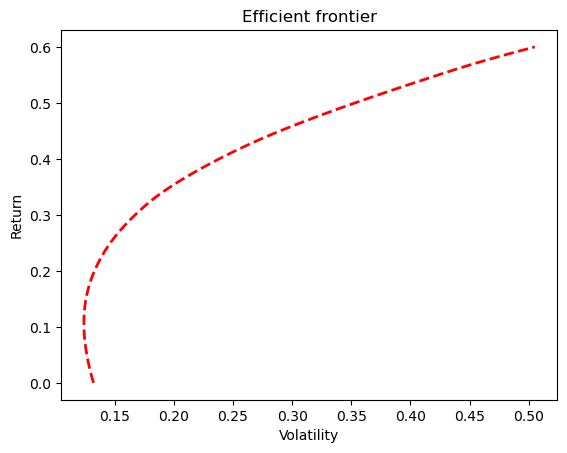

In [22]:
#Plotting the efficient frontier
plt.plot(ef_vol, ef_ret, "r--", linewidth = 2)
plt.xlabel("Volatility")
plt.ylabel("Return")
plt.title("Efficient frontier")
plt.show()

In [23]:
#Obtaining the Capital Market line that should be tangential to the Markowitz efficient frontier 
cml_x = np.linspace(0.05, 0.4, 1000)
cml_y = [risk_free_rate + (ms_ret - risk_free_rate) / (ms_vol) * volatility for volatility in cml_x]

In [24]:
#Plotting the Efficient frontier, CML, Minimum variance portfolio, Markowitz portfolio and original portfolio
fig = go.Figure()

fig.add_trace(go.Scatter(x=cml_x, y=cml_y, mode='lines', name='Capital Market Line', line=dict(width=2)))
fig.add_trace(go.Scatter(x=ef_vol, y=ef_ret, mode='lines', name='Markowitz Efficient Frontier', line=dict(width=2)))
fig.add_trace(go.Scatter(x=[mv_vol], y=[mv_ret], mode='markers', marker=dict(size=8, color='green'), name='Minimum Variance Portfolio'))
fig.add_trace(go.Scatter(x=[ms_vol], y=[ms_ret], mode='markers', marker=dict(size=8, color='red'), name='Markowitz Portfolio (Maximum Sharpe)'))
fig.add_trace(go.Scatter(x=[ori_volatility], y=[ori_return], mode='markers', marker=dict(size=8, color='blue'), name='Original Portfolio'))

fig.update_layout(title='Markowitz Efficient Frontier and Capital Market Line', xaxis_title='Volatility', yaxis_title='Return')
fig.show()